In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [42]:
#-----------Prediction model (Delivery Time ~ Sorting Time)---------------------------------

In [3]:
deliveryTime = pd.read_csv("delivery_time.csv")

In [50]:
#EDA

In [16]:
deliveryTime = deliveryTime.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

In [24]:
#dataset does not contain any null values
deliveryTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [28]:
#Also, dataset does not contain any duplicate observation
deliveryTime.duplicated().sum()

0

Text(0.5, 1.0, 'Sorting Time')

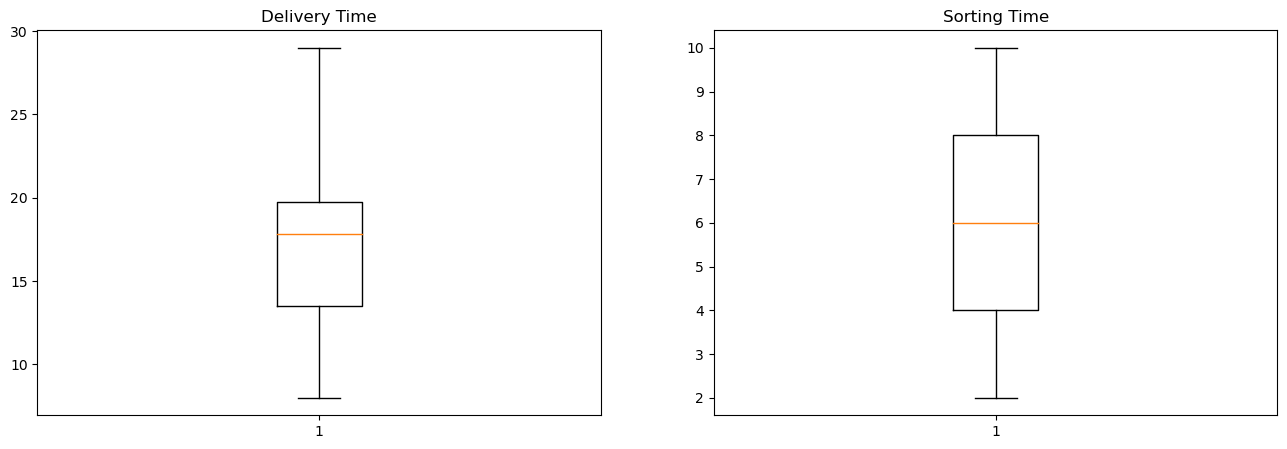

In [52]:
#Check for outliers
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.boxplot(deliveryTime.Delivery_Time)
plt.title("Delivery Time")
plt.subplot(122)
plt.boxplot(deliveryTime.Sorting_Time)
plt.title("Sorting Time")
# from boxplot , we conclude that dataset doesn't contain any outliers

In [17]:
deliveryTime.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

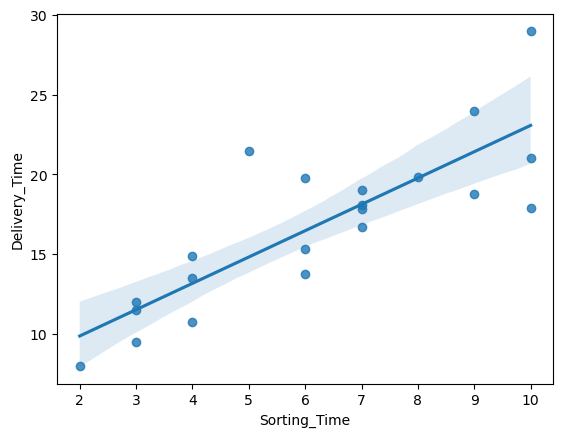

In [31]:
#Now we plot reg plot to visualize corr between Delivery time and Sorting time
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=deliveryTime)

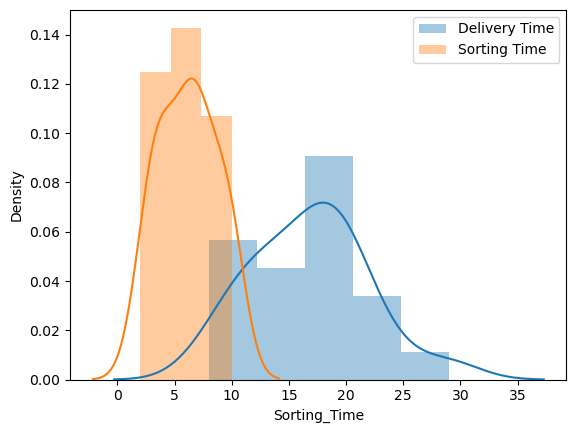

In [18]:
sns.distplot(deliveryTime["Delivery_Time"],label="Delivery Time")
sns.distplot(deliveryTime["Sorting_Time"],label="Sorting Time")
plt.legend()

In [47]:
#model creation and summary
deliveryTime_model = smf.ols("Delivery_Time ~ Sorting_Time",data=deliveryTime).fit()
deliveryTime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        11:33:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Coefficients
deliveryTime_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [21]:
# t-values and p-values
print(deliveryTime_model.tvalues,"\n",deliveryTime_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [33]:
#R-squared values
print(f"r-squared values : {deliveryTime_model.rsquared} \nAdj. r-squared values : {deliveryTime_model.rsquared_adj}")

r-squared values : 0.6822714748417231 
Adj. r-squared values : 0.6655489208860244


In [34]:
#-----Model Prediction---------------

In [41]:
#Manual Prediction for sorting time 8
delivery_Time = (6.582734) + (1.649020)*8
delivery_Time

19.774894

In [37]:
#Automatic prediction using model, range of sorting time (2,10)
newData = pd.Series([7,8,6])
test_df = pd.DataFrame(newData,columns=["Sorting_Time"])
test_df

,Sorting_Time
0,7
1,8
2,6


In [38]:
deliveryTime_model.predict(test_df)

0    18.125873
1    19.774893
2    16.476853
dtype: float64

In [43]:
#-----------Prediction model (Delivery Time ~ Sorting Time)---------------------------------

In [44]:
salaryData = pd.read_csv("Salary_Data.csv")

In [ ]:
#EDA

In [46]:
salaryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [48]:
#Finding any null values
salaryData.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [49]:
#finding Duplicate observation
salaryData.duplicated().sum()

0

Text(0.5, 1.0, 'Salary')

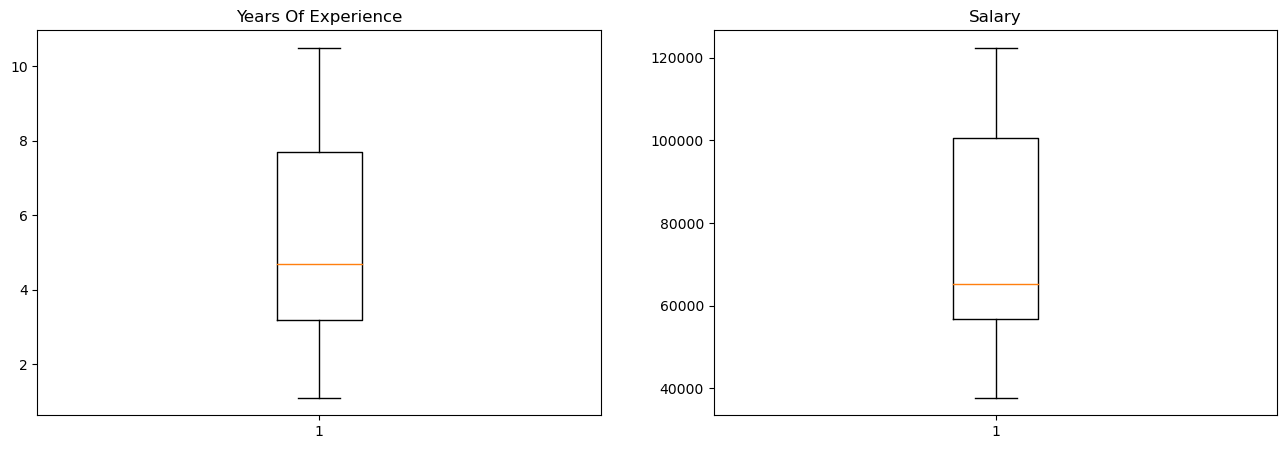

In [54]:
#Check for outliers
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.boxplot(salaryData["YearsExperience"])
plt.title("Years Of Experience")
plt.subplot(122)
plt.boxplot(salaryData["Salary"])
plt.title("Salary")

In [55]:
#Correlation matrix
salaryData.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

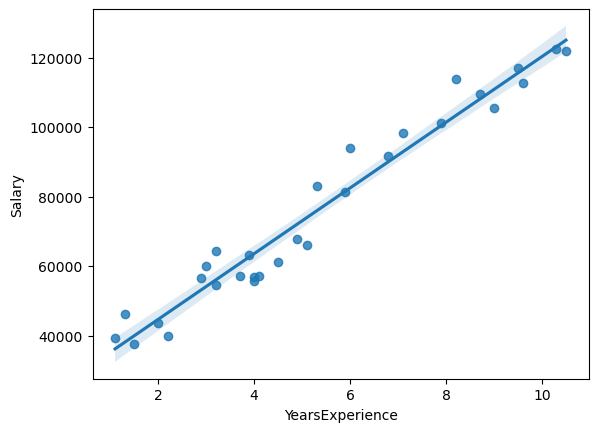

In [56]:
#Regression Plot
sns.regplot(x="YearsExperience",y="Salary", data=salaryData)

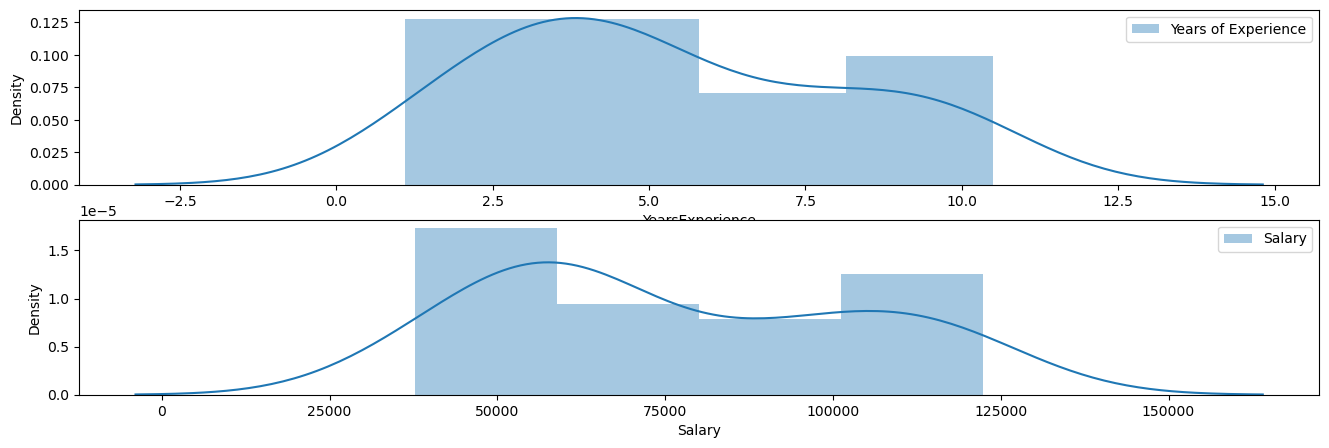

In [60]:
#Density plot
plt.figure(figsize=(16,5))
plt.subplot(211)
sns.distplot(salaryData["YearsExperience"],label="Years of Experience")
plt.legend()
plt.subplot(212)
sns.distplot(salaryData["Salary"],label="Salary")
plt.legend()

In [61]:
#Model Building

In [62]:
salary_model = smf.ols("Salary ~ YearsExperience",data=salaryData).fit()

In [63]:
#model summary
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        11:47:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [71]:
#t-values and p-values
print("t-values: \n",salary_model.tvalues,"\np-values: \n",salary_model.pvalues)

t-values: 
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
p-values: 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [75]:
#r-squared values
print(f"r-squared values : {salary_model.rsquared} \nAdj. r-squared values : {salary_model.rsquared_adj}")

r-squared values : 0.9569566641435086 
Adj. r-squared values : 0.9554194021486339


In [65]:
#Model Predictions
#Manual predictions for say 3 year of experience
salary_hike = (25792.200199) + (9449.962321) * 3
salary_hike

54142.087162

In [73]:
#Automatic Prediction using model
newData2 = pd.Series([4,3,8])
test_df2 = pd.DataFrame(newData2,columns=["YearsExperience"])
test_df2

,YearsExperience
0,4
1,3
2,8


In [74]:
salary_model.predict(test_df2)

0     63592.049484
1     54142.087163
2    101391.898770
dtype: float64